# Soal 3

Sebuah toko komputer menjual laptop dengan ukuran RAM sebesar 8 ± x GB. Diketahui bahwa distribusi ukuran RAM laptop tersebut berdistribusi normal dengan rata-rata 8 GB dan standard deviasi 0.5 GB. Jika toko tersebut ingin memastikan bahwa setidaknya 90% laptop yang dijual memiliki RAM setidaknya 7 GB, berapakah nilai x yang harus ditetapkan?

### Jawaban

Import Library

In [5]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

Mendata semua variabel yang diketahui pada soal

In [6]:
# Diberikan
mean = 8       # Rata-rata ukuran RAM (GB)
std_dev = 0.5  # Standar deviasi ukuran RAM (GB)
conf_level = 0.9  # Tingkat kepercayaan yang diinginkan (90%)
min_ram = 7    # Ukuran RAM minimal yang diinginkan (GB)

Mencari nilai z score dengan tingkat kepercayaan 90%

In [7]:
# Menghitung nilai z-score untuk tingkat kepercayaan 90%
z_score = norm.ppf(1 - conf_level)
print(f"Nilai z-score untuk tingkat kepercayaan {conf_level*100}% adalah: {z_score:.2f}")

Nilai z-score untuk tingkat kepercayaan 90.0% adalah: -1.28


Visualisasi distribusi normal dengan nilai z score > 90%

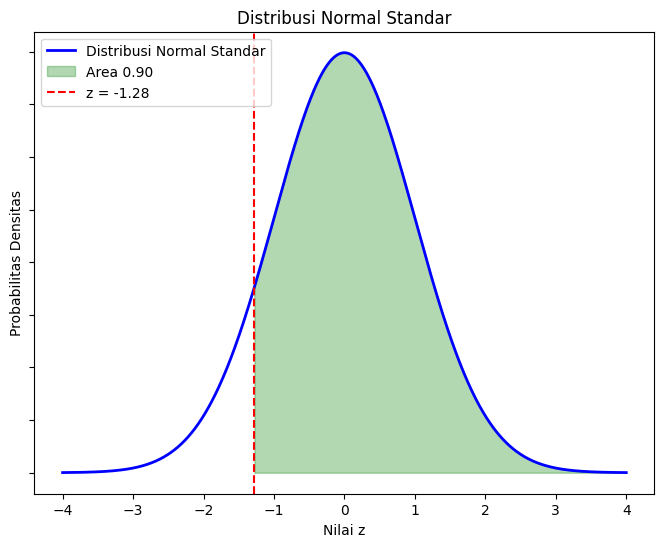

In [8]:
# Membuat array x untuk visualisasi distribusi normal
x = np.linspace(-4, 4, 1000)
y = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

# Menghitung area di bawah kurva sebelah kiri dari z-score 1.04
area_left = np.trapz(y[:np.where(x <= z_score)[0][-1]+1], x[:np.where(x <= z_score)[0][-1]+1])
area_right = 1 - area_left

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'b-', lw=2, label='Distribusi Normal Standar')
ax.fill_between(x, 0, y, where=(x >= z_score), color='g', alpha=0.3, label=f'Area {area_right:.2f}')
ax.axvline(z_score, color='r', linestyle='--', label=f'z = {z_score:.2f}')
ax.legend(loc='upper left')
ax.set_title('Distribusi Normal Standar')
ax.set_xlabel('Nilai z')
ax.set_ylabel('Probabilitas Densitas')
ax.tick_params(axis='y', labelleft=False)  # Menyembunyikan angka pada sumbu y
plt.savefig("z-score.jpg")
plt.show()

Menghitung nilai x

In [12]:
# Menghitung nilai x
x = z_score * std_dev
print(f"Nilai x adalah: {x:.2f} GB")

Nilai x adalah: -0.64 GB


Batas bawah RAM agar 90% laptop setidaknya memiliki RAM 7 GB

In [13]:
# Menghitung batas bawah
lower_a = mean + x
print(f"Batas bawah RAM: {lower_a:.2f} GB")

Batas bawah RAM: 7.36 GB


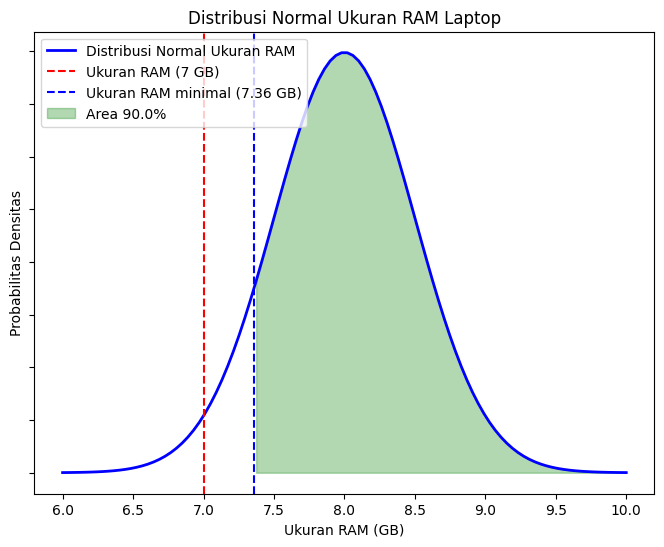

In [18]:
# Memvisualisasikan distribusi normal
x_axis = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
y = norm.pdf(x_axis, loc=mean, scale=std_dev)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_axis, y, 'b-', lw=2, label='Distribusi Normal Ukuran RAM')
ax.axvline(min_ram, color='r', linestyle='--', label=f'Ukuran RAM ({min_ram} GB)')
ax.axvline(lower_a, color='b', linestyle='--', label=f'Ukuran RAM minimal ({lower_a:.2f} GB)')
ax.fill_between(x_axis, 0, y, where=(x_axis >= lower_a), color='g', alpha=0.3, label=f'Area {conf_level*100}%')
ax.legend(loc='upper left')
ax.set_title('Distribusi Normal Ukuran RAM Laptop')
ax.set_xlabel('Ukuran RAM (GB)')
ax.set_ylabel('Probabilitas Densitas')
ax.tick_params(axis='y', labelleft=False)  # Menyembunyikan angka pada sumbu y
plt.savefig("ukuran-ram.jpg")
plt.show()